(Impedance, Transmission and Reflection)=
# Impedance, Transmission and Reflection

In this chapter, impedance, reflection and transmission will be discussed.

In [15]:
import numpy as np
import matplotlib.pyplot as plt

## Impedance

Impedance is a measure of how difficult it is for a wave to travel through a certain medium.

The physical properties characterizing the model are:
density ($\rho$) and
seismic velocity ($c$)
The acoustic impedance of each layer is: $$ Z = \rho c   $$
with units $[kg s^{-1}]$.

Consider a reflectivity model and let's calculate the impedance for all three layers.
<img src="https://github.com/geoscixyz/geosci-labs/blob/main/images/seismic/Step3FixedMod.png?raw=true" alt="image info" width="300" 
     height="300"/>

In [7]:
def acoustic_impedance(rho, c, layer_number):
    z = rho*c
    print('The acoustic impedance of layer', layer_number, '=', z, 'kg s^-1')
    return z

rho1 = 2000
v1 = 500
rho2 = 2300
v2 = 1000
rho3 = 2300
v3 = 1500

z1 = acoustic_impedance(rho1, v1, 1)
z2 = acoustic_impedance(rho2, v2, 2)
z3 = acoustic_impedance(rho3, v3, 3)

The acoustic impedance of layer 1 = 1000000 kg s^-1
The acoustic impedance of layer 2 = 2300000 kg s^-1
The acoustic impedance of layer 3 = 3450000 kg s^-1


It can thus be seen that a higher seismic velocity results in a higher impedance and thus easier passage for the wave. This is similar for a higher density.

## Reflection and Transmission (Transverse waves)

Consider acoustic impedance in a different light where a seismic wave travels through a medium. When an incident wave apporaches a boundary of different density and seismic velocity (thus, different impedance), a wave can reflected or transmitted. We make a few assumptions:

- y_i + y_r = y_p (for a continuous string across a boundary and conservation of energy)
- tension in the string must be continuous

Consider the subscript i for the incidence wave, r for the reflected wave and p for the propagating/transmitted wave.

Consider coefficients of reflection and transmission now as the ratio between the amplitude of the reflected/transmitted wave and incident wave respectively.

The reflection coefficient is $$ R = \frac{y_{0r}}{y_{0i}}$$ and the transmission coefficient is $$ P = \frac{y_{0p}}{y_{0i}}$$.

For this module, we are assuming that the incident wave travels normal to the boundary. Thus $\theta i$ is 0, as well as $\theta r$ and $\theta p$.

<img src="https://ars.els-cdn.com/content/image/1-s2.0-S138373031023003X-gr2.gif" alt="image info" width="300" 
     height="300"/>
From acoustic impedance, the down-going reflection coefficient for amplitude is given by $$ R = \frac{Z_{1}-Z_2}{Z_1+Z_2} $$

and the transmission coefficient is $$ P = \frac{2Z_{1}}{Z_1+Z_2} $$

Considering wave energy transfer, where wave total energy per unit string is defined as: $ E = \frac{ \rho \omega^2 {y_0}^2}{2}$.

$$ R = (\frac{Z_{1}-Z_2}{Z_1+Z_2})^2 $$

and the transmission coefficient is $$ P = \frac{4 Z_{1} Z_2}
{(Z_1+Z_2)^2} $$

**Note that 1 + R = P always, from conservation of energy**

Reflection and transmission coefficients as a function of impedances.

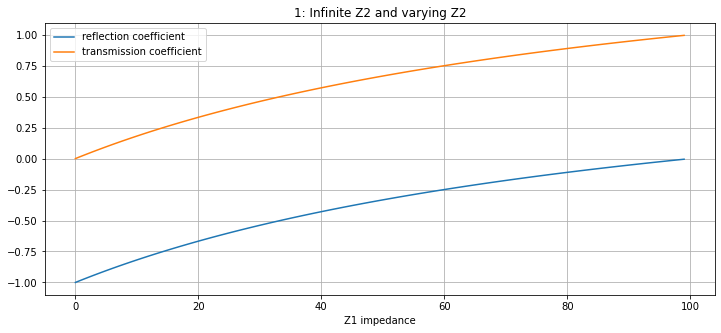

In [35]:
def R_coeff(Z1, Z2):
    return (Z1 - Z2)/(Z1 + Z2)

def P_coeff(Z1, Z2):
    return (2*Z1)/(Z1 + Z2)

Z1 = list(range(0, 100,1))
Z20 = 100 # substitute for infinity but works too

plt.figure(figsize=(12,5))
plt.xlabel("Z1 impedance")

R_coeffs = [R_coeff(item, Z20) for item in Z1]
P_coeffs = [P_coeff(item, Z20) for item in Z1]

plt.plot(Z1, R_coeffs, label = 'reflection coefficient')
plt.plot(Z1, P_coeffs, label = 'transmission coefficient')
plt.legend()
plt.grid(True)
plt.title("1: Infinite Z2 and varying Z2")
plt.show()

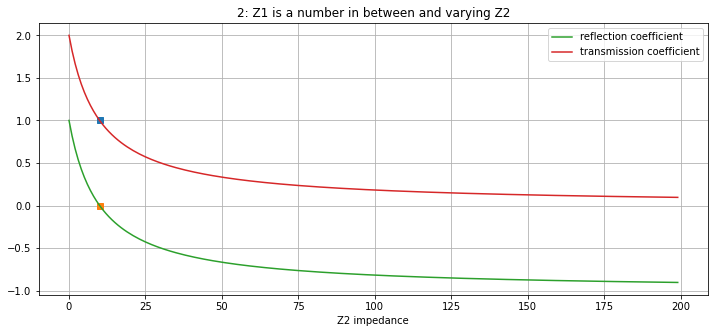

In [34]:
plt.figure(figsize=(12,5))
plt.xlabel("Z2 impedance")

Z10 = 10
Z2 = list(range(0, 200,1))

R_coeffs = [R_coeff(Z10, item) for item in Z2]
P_coeffs = [P_coeff(Z10, item) for item in Z2]

x0 = [10]
y0 = [1]
y1 = [0]
plt.plot(x0, y0, "s")
plt.plot(x0, y1, "s")

plt.plot(Z2, R_coeffs, label = 'reflection coefficient')
plt.plot(Z2, P_coeffs, label = 'transmission coefficient')
plt.legend()
plt.grid(True)
plt.title("2: Z1 is a number in between and varying Z2")
plt.show()

- Note that when Z1 $\rightarrow 0$ (start of graph 1) and Z2 $\rightarrow \infty$ (end of graph 2), the reflection coefficient is -1 and transmission coefficient is 0. This means that the wave is completely reflected and has a phase change of $\pi$
- If Z2 is zero, the incident wave is reflected, so the reflection coefficient is 1, and the transmission coefficient is 2. No wave can pass through layer 2 if Z2 is zero.
- If Z1=Z2 (markers on graph 2), the reflection coefficient is 0 and the transmission coefficient is 1. There is virtually no boundary as the properties, density and seismic velocity, of the media are the same.

## Reflection and Transmission (Longitudinal waves)
As longitudinal waves travel through a medium, vibrations lead to pressure waves within the medium, with a phase difference of $\pi$. Since the longitudinal wave and pressure wave are in anti-phase, the reflection and transmission coefficients for the pressure wave are as follows:

$$ R = \frac{Z_2-Z_1}{Z_1+Z_2} $$

and the transmission coefficient is $$ P = \frac{2Z_2}{Z_1+Z_2} $$



### References

Imperial College waves lecture notes

https://github.com/geoscixyz/gpgLabs